In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP

generowanie fig - to będzie do zmiany

In [12]:

## kod pożyczony
# (można sprawdzić, czy napewno dobry w wielu wymiarach)
# torus
def generate_n_dimensional_torus(n_dimensions, n_points, R=2, r=1):
    """
    Creates an n-dimensional torus.

    Parameters:
    n_dimensions : int
        The number of dimensions for the torus. Must be greater than or equal to 2.
    n_points : int
        The number of points.
    R : float
        The distance from the center of the tube to the center of the torus.
    r : float
        The radius of the tube (distance from the center of the tube to the torus surface).

    Returns:
    numpy.ndarray
        The n-dimensional points of the torus.
    """

    assert n_dimensions >= 2, "Number of dimensions must be greater than or equal to 2."

    # generate n_points random angles for each dimension
    angles = np.random.uniform(0, 2*np.pi, (n_points, n_dimensions))

    # calculate the n-dimensional points on the torus
    coordinates = []
    for i in range(n_dimensions):
        if i == 0:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.cos(angles[:, 0])
        elif i == 1:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.sin(angles[:, 0])
        else:
            coordinate = r * np.sin(angles[:, i])
        coordinates.append(coordinate)

    return np.array(coordinates).T

#https://blogs.sas.com/content/iml/2016/04/06/generate-points-uniformly-in-ball.html
def ball_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # obliczanie normy
    norm = np.linalg.norm(xi, axis=0)

    S = xi / norm
    U = np.random.uniform(low=0.0, high=1.0, size=N)
    S = S * np.power(U, 1/dim)
    points = S * radius

    # Transponowanie macierzy punktów
    # points = scaled_xi.T

    return points.T

def sphere_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # Obliczanie sumy kwadratów zmiennych losowych dla każdego punktu
    sum_of_squares = np.sum(xi**2, axis=0)

    # Obliczanie wartości λ na podstawie żądanej wartości
    lambda_squared = radius**2

    # Skalowanie zmiennych losowych dla każdego punktu, aby uzyskać żądaną wartość λ
    scaled_xi = xi * np.sqrt(lambda_squared / sum_of_squares)

    # Transponowanie macierzy punktów
    # unit_vectors = scaled_xi.T

    # return unit_vecto
    return scaled_xi.T

redukcja wymiarowości

In [33]:
def TSNE_reduce(data):
    tsne = TSNE()
    return tsne.fit_transform(data), "TSNE"

def Umap_reduce(data):
    umap = UMAP()
    return umap.fit_transform(data), "Umap"

def Trimap_reduce(data):
    trimap = TRIMAP()
    return trimap.fit_transform(data), "Trimap"

def Pacmap_reduce(data):
    pacmap = PaCMAP()
    return pacmap.fit_transform(data), "Pacmap"

# def IVHD_reduce(data):
#     ...



In [14]:
# def show_plot(reduction_method):
#     dimensions = [8, 6, 3]
#     emem = [100, 150, 200]
#     colors = ['b', 'g', 'r']  # Define colors for each set
#
#     fig, axes = plt.subplots(len(dimensions), len(emem))
#
#     for i, d in enumerate(dimensions):
#         for j, e in enumerate(emem):
#             #show_plot(TSNE_reduce)
#             sphere_points = sphere_points_generator(d, e, 5)
#             ball_points = ball_points_generator(d, e, 2)
#             data = np.concatenate((sphere_points, ball_points))
#
#             # tsne
#             reduced = reduction_method(data)
#
#             # Plot in the corresponding subplot
#             axes[i, j].set_title(f"dim: {d}, elem: {e}")
#             axes[i, j].axis('off')
#
#             # Assign colors based on the sets
#             axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
#             axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='Ball Points')
#
#     plt.tight_layout()
#
#     # Create a single legend for all plots
#     handles, labels = axes[0, 0].get_legend_handles_labels()
#     fig.legend(handles, labels)
#
#     plt.show()
#
#
# show_plot(Trimap_reduce)

In [20]:
## losowe generowanie

#kulka i 2 sfery
def ball_two_sphere(dim,points):
    sphere_points = sphere_points_generator(dim, points, 5)
    sphere_points2 = sphere_points_generator(dim, points, 7)
    ball_points = ball_points_generator(dim, points, 2)
    return np.concatenate((sphere_points, sphere_points2, ball_points)), 3

#one sphere one ball
def ball_sphere(dim,points):
        sphere_points = sphere_points_generator(dim, points, 5)
        ball_points = ball_points_generator(dim, points, 2)
        return  np.concatenate((sphere_points, ball_points)), 2


def one_sphere_one_torus_inside_dataset( dim, points_number, sphere_r=4, torus_R=2, torus_r=1):

     sphere_points = sphere_points_generator(dim, points_number, sphere_r)
     torus_points = generate_n_dimensional_torus(dim, points_number, torus_R, torus_r)

     return np.concatenate((sphere_points, torus_points)), 4


In [48]:
import os


# points_list = [1000, 2000, 5000, 20000, 50000]
# dimmentions = [3, 5, 10, 20]




def show_plot(reduction_method, data):
    dimensions = [3, 5, 10, 20]
    emem = [1000, 2000, 5000, 20000, 50000]
    colors = ['b', 'g', 'r']  # Define colors for each set

    fig, axes = plt.subplots(len(dimensions), len(emem))
    plt_name = ""
    for i, d in enumerate(dimensions):
        for j, e in enumerate(emem):
            # tsne
            dataset, object_count = data(d,e)
            reduced, red_name = reduction_method(dataset) #to

            #generate_metrics(reduced)
            # print(type(dataset))
            # print(type(reduced))
            # Plot in the corresponding subplot
            axes[i, j].set_title(f"dim: {d}, elem: {e}")
            axes[i, j].axis('off')
            fig_name = ''

            #if object_count == 2:
            if object_count == 2:
                # Assign colors based on the sets
                axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='Ball Points')
                fig_name = "ball_sphere"
            elif object_count == 3:
                axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[1], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[e:2*e, 0], reduced[e:2*e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[2*e:, 0], reduced[2*e:, 1], c=colors[2], alpha=0.5, label='Ball Points')
                fig_name ="ball_two_sphere"
            else:
                axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
                axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='torus_points')
                fig_name = "one_sphere_one_torus_inside_dataset"

            #zapis do csv
            #self.to_csv(df, f'datasets/one_sphere_one_torus_inside/dim_{dim}_points_{points_number}.csv')
            # Sprawdzenie, czy folder istnieje
            folder_path = f"datasets/{red_name}/{fig_name}"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            # Zapis plików
            np.savetxt(f"{folder_path}/EMB_dim_{d}_points_{e}.csv", reduced, delimiter=",")
            np.savetxt(f"{folder_path}/DATA_dim_{d}_points_{e}.csv", dataset, delimiter=",")
            plt_name = f'plots_final/{red_name}_{fig_name}.png'


    plt.tight_layout()

    # Create a single legend for all plots
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels)
    plt.savefig(plt_name)
    print(plt_name)

In [49]:
#show_plot(Trimap_reduce,ball_two_sphere)

In [50]:
#show_plot(Umap_reduce,ball_two_sphere)


TSNE


KeyboardInterrupt: 

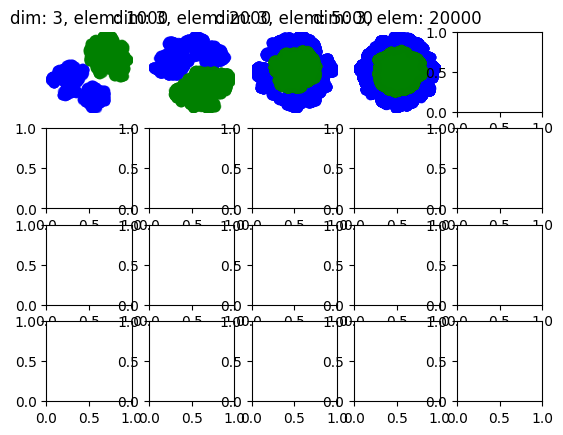

In [51]:
reduction_dict = { "TSNE": TSNE_reduce,"Umap":Umap_reduce,"Trimap":Trimap_reduce,"Pacmap":Pacmap_reduce}
figure_dict = {"ball_sphere" : ball_sphere, "ball_two_sphere": ball_two_sphere, "one_sphere_one_torus_inside_dataset":one_sphere_one_torus_inside_dataset}
for reduction_name, reduction_m in reduction_dict.items():
    print(reduction_name)
    for figure_name, generate_figure in figure_dict.items():
        #print(figure_name)
        show_plot(reduction_m, generate_figure)


In [ ]:
####to jest na razie on hold

In [ ]:
# def show_plot(reduction_method,data, dimensions, points_list):
#     colors = ['b', 'g', 'r']  # Define colors for each set
#
#     fig, axes = plt.subplots(len(dimensions), len(points_list))
#
#     for i, d in enumerate(dimensions):
#         for j, e in enumerate(points_list):
#             # tsne
#             reduced = reduction_method(data)
#
#             # Plot in the corresponding subplot
#             axes[i, j].set_title(f"dim: {d}, elem: {e}")
#             axes[i, j].axis('off')
#
#             # Assign colors based on the sets
#             axes[i, j].scatter(reduced[:e, 0], reduced[:e, 1], c=colors[0], alpha=0.5, label='Sphere Points')
#             axes[i, j].scatter(reduced[e:, 0], reduced[e:, 1], c=colors[1], alpha=0.5, label='Ball Points')
#
#     plt.tight_layout()
#
#     # Create a single legend for all plots
#     handles, labels = axes[0, 0].get_legend_handles_labels()
#     fig.legend(handles, labels)
#
#     plt.show()




In [ ]:
# import os
# import numpy as np
# import csv
# import re
#
#
#
#
# def read_directory_to_ndarrays(directory_path, delimiter=','):
#     try:
#         file_data = {}
#
#         # Iterate over all files in the directory
#         for file_name in os.listdir(directory_path):
#             file_path = os.path.join(directory_path, file_name)
#
#             # Read the CSV file using the csv module
#             with open(file_path, 'r') as file:
#                 reader = csv.reader(file, delimiter=delimiter)
#                 data_list = list(reader)
#
#             # Convert the data into a NumPy ndarray
#             data_array = np.array(data_list)
#
#             # Store the ndarray with the corresponding file name
#             file_data[file_name] = data_array
#
#         return file_data
#
#     except IOError as e:
#         print("Error reading the directory:", str(e))
#         return None
#
#
# directory_path = 'M:/Studia/nie/DataVisualizationProject-main/datasets/one_sphere_one_torus_inside'
# data_dict = read_directory_to_ndarrays(directory_path)
#
#
#
# if data_dict is not None:
#     for file_name, data in data_dict.items():
#         print("File name:", file_name)
#         matches = re.findall(r'\d+', file_name)
#         numbers = [int(match) for match in matches]
#         print(data)
#         show_plot(Trimap_reduce, data)
#





